In [87]:
#define a permutation group of size n!
n=4
G=SymmetricGroup(n)

In [88]:
#define the Fourier transform at the representation spc
#which is the Specht module corresponding to partition
def f_hat(f,partition):
    spc = SymmetricGroupRepresentation(partition, 'specht')
    return sum(f(sigma)*spc.representation_matrix(Permutation(sigma)) for sigma in G)

In [134]:
def fourier_coeffs(f):
    return {partition:f_hat(f,partition) for partition in Partitions(n)}

In [10]:
#define the inverse Fourier transform
#given a collection of matrices for each representation rho_i
def fourier_inv(sigma,f_hat):
    value=0
    for partition in Partitions(n):
        spc = SymmetricGroupRepresentation(partition, 'specht')
        repn_mat = spc.representation_matrix(Permutation(sigma).inverse())
        d_part = repn_mat.ncols() #should extract directly from parition of rep'n
        fourier_coeff = f_hat[partition] #fourier coefficient
        value += d_part*(repn_mat*fourier_coeff).trace()
    return (1/G.order())*value

In [ ]:
#one way to build functions of a group G is to use a rep'n
#given an action of G on C^n, one can take any function g:C^n-->C
#and precompose so that f(sigma) = g(sigma*x_0) for a given point x_0
#note that f inherits symmetry properties of the function g
#for instance, if g(x)=sum_i x_i, then g is invariant under S_n
#f(sigma)=g(sigma*x_0)=g(x_0)=constant
x_0=vector([1,2,3,4])
def g(x):
    #return sum(x_i for x_i in x)
    return x[0]-x[1]+x[2]
#note that C^3 is the sum of the standard rep'n and the trivial rep'n
#so that sigma*x = sigma*(x_triv+x_std), i.e. the sign rep'n component of x is zero
#so the f cannot depend on it
def f(sigma):
    #return g(Permutation(sigma).to_matrix()*x_0)
    #return Permutation(sigma).sign()
    return min(len(c) for c in Permutation(sigma).to_cycles())

In [ ]:
fourier_inv(Permutation([3,1,2,4]),fourier_coeffs(f))==f(Permutation([3,1,2,4]))

In [47]:
#the representation ring of S_3 is isomorphic to Z[X,Y]/(XY − Y,X2 − 1,Y2 − X − Y − 1)

In [140]:
fourier_coeffs(f)

{[4]: [45],
 [3, 1]: [-7  0  0]
 [ 0 -7  0]
 [ 0  0 -7],
 [2, 2]: [3 0]
 [0 3],
 [2, 1, 1]: [5 0 0]
 [0 5 0]
 [0 0 5],
 [1, 1, 1, 1]: [-15]}

In [139]:
f_list=[f(sigma) for sigma in G]; f_list

[1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4]

In [76]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [143]:
fourier_coeffs_list_f=sum([flatten(fourier_coeffs(f)[part]) for part in Partitions(n)], []); fourier_coeffs_list

[45, -7, 0, 0, 0, -7, 0, 0, 0, -7, 3, 0, 0, 3, 5, 0, 0, 0, 5, 0, 0, 0, 5, -15]

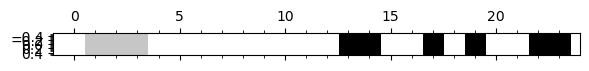

In [144]:
matrix_plot([f_list])

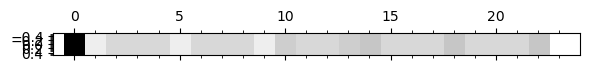

In [145]:
matrix_plot([fourier_coeffs_list_f])

In [132]:
L=20
assert(L < G.order())
data=[i for i in range(L)]
data_padding = data + (G.order()-L)*[0]
#find the index of the element sigma
def group_index(sigma):
    for i in range(G.order()):
        if Permutation(sigma) == Permutation(G[i]):
            index = i
    return index
def h(sigma):
    return data_padding[group_index(sigma)]

In [133]:
h(Permutation([1,2,4,3]))

12

In [126]:
Permutation([1,2,3,4])

[1, 2, 3, 4]

In [148]:
fourier_coeffs(h)

{[4]: [190],
 [3, 1]: [-9 -1  2]
 [-9 -1  2]
 [-3  1  2],
 [2, 2]: [ 38 -86]
 [  0 -86],
 [2, 1, 1]: [-3  3 -1]
 [-1  1  1]
 [-2  2 -2],
 [1, 1, 1, 1]: [-58]}

In [149]:
fourier_coeffs_list_h=sum([flatten(fourier_coeffs(h)[part]) for part in Partitions(n)], [])

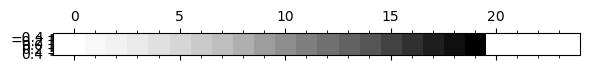

In [154]:
matrix_plot([data_padding])

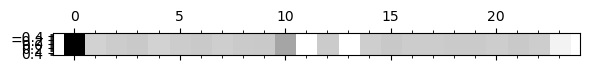

In [152]:
matrix_plot([fourier_coeffs_list_h])